In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [11]:
filename = 'static/data/melon_song_v3.csv'
plist_filename1 = 'static/data/melon_playlist1.csv'
plist_filename2 = 'static/data/melon_playlist2_v2.csv'

In [12]:
df = pd.read_csv(filename)
plist1 = pd.read_csv(plist_filename1)
plist2 = pd.read_csv(plist_filename2)
df.shape, plist1.shape, plist2.shape

((6243, 14), (3845, 5), (60264, 5))

In [13]:
df.head(1)

,songId,title,artist,genre,album,lyricist,composer,date,img,comment,like,lyric,plylstSeq,ly_summary
0,418168,희재,성시경,발라드 국내영화,국화꽃 향기 OST,양재선,MGR,2003.02.01,https://cdnimg.melon.co.kr/cm/album/images/000...,332,138267,햇살은 우릴 위해 내리고\n바람도 서롤 감싸게 했죠\n우리 웃음속에 계절은 오고\n...,445029956 411111859,정말로 울면 내가 그댈 보내<br>준 것 같아서


In [73]:
# df['date'][:4]
df.date.apply(lambda x :0 if x == '-' else x[:4]).astype(int)

0       2003
1       2022
2       2005
3       2022
4       2022
        ... 
6238    2020
6239    2005
6240    1994
6241    2021
6242    2018
Name: date, Length: 6243, dtype: int32

In [74]:
df['year'] = df.date.apply(lambda x :0 if x == '-' else x[:4]).astype(int)

In [28]:
df.genre.sort_index(ascending=False)

6242     인디음악 포크/블루스
6241    포크/블루스 국내드라마
6240          포크/블루스
6239          포크/블루스
6238          포크/블루스
            ...     
4          록/메탈 국내영화
3           발라드 국내영화
2           발라드 국내영화
1           발라드 국내영화
0           발라드 국내영화
Name: genre, Length: 6243, dtype: object

In [34]:
a = df.genre.value_counts().head(10).to_frame()
a

,count
genre,
발라드,957
성인가요/트로트,818
댄스,692
랩/힙합,473
국내뮤지컬,470
록/메탈,467
R&B/Soul,458
발라드 국내드라마,350
포크/블루스,295


In [64]:
a['count']

genre
발라드            957
성인가요/트로트       818
댄스             692
랩/힙합           473
국내뮤지컬          470
록/메탈           467
R&B/Soul       458
발라드 국내드라마      350
포크/블루스         295
인디음악 포크/블루스    275
Name: count, dtype: int64

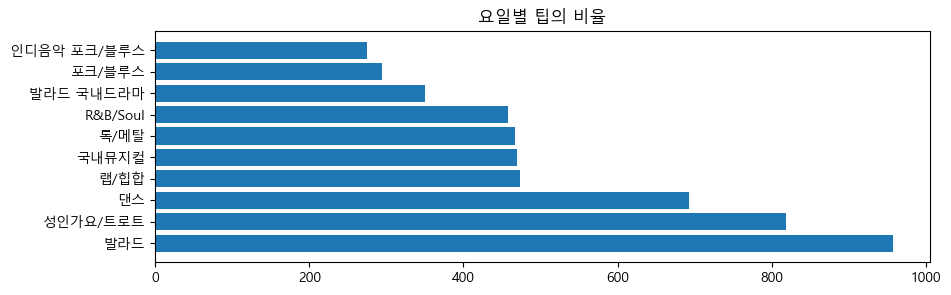

In [67]:
plt.figure(figsize=(10,3))
plt.barh(a.index, a['count'])
plt.title('요일별 팁의 비율')
plt.show()

In [75]:
# ab = a.pivot_table('genre','count')
# df.date.apply(lambda x :0 if x == '-' else x[:4] ).astype(int)
year = []
for i in df.date.values:
    if i == '-':
        year.append(0)
    else:
        a = int(i[:4])
        if 1960 <= a < 1970:
            year.append(1960)
        elif 1970 <= a < 1980: 
            year.append(1970)
        elif 1980 <= a < 1990: 
            year.append(1980)
        elif 1990 <= a < 2000: 
            year.append(1990)
        elif 2000 <= a < 2010: 
            year.append(2000)
        elif 2010 <= a < 2020: 
            year.append(2010)
        else:
            year.append(2020)

In [ ]:
df['year'] = year
df.tail()

In [95]:
g = df.year.value_counts().astype(int).to_frame()
g

,count
year,
2020,2182
2010,1899
2000,994
1990,678
1980,401
0,45
1970,42
1960,2


In [141]:
len(g.values)

8

In [161]:
g.index.values

array([2020, 2010, 2000, 1990, 1980,    0, 1970, 1960], dtype=int64)

In [173]:
g.values

array([[2182],
       [1899],
       [ 994],
       [ 678],
       [ 401],
       [  45],
       [  42],
       [   2]])

In [162]:
[g.iloc[0][0]]

[2182]

In [174]:
li = []
for i in range(len(g.values)):
    abc = g.values[i][0]
    li.append(abc)
li

[2182, 1899, 994, 678, 401, 45, 42, 2]

In [96]:
g.columns

Index(['count'], dtype='object')

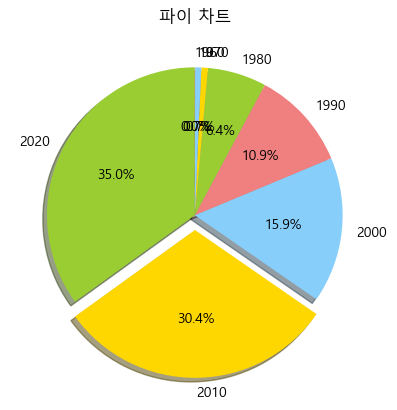

In [175]:
ratio = li #합이 100이 아니어도 됨
labels = g.index
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0,0,0,0,0) # 두번째 값이 밖으로 튀어 나오게해줘라
plt.pie(ratio, labels=labels , autopct='%.1f%%', colors=colors, explode=explode,
         startangle=90, shadow=True) # 시작위치 90도 
plt.title('파이 차트')
plt.show()

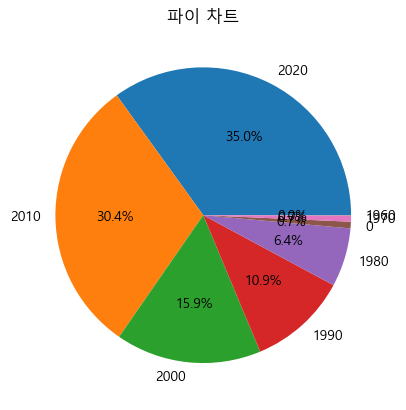

In [148]:
plt.pie(ratio, labels=labels , autopct='%.1f%%') # 소숫점한자리까지 %% 맥프로우?
plt.title('파이 차트')
plt.show()

In [ ]:
df = df.pivot_table('genre','count')
dt = df.pivot_table(values='genre',index='class', columns='sex', aggfunc='count')

df.pivot(values='genre' ,index='count', columns=df.iloc[0]['date'][0:4])

In [156]:
# df.pivot_table('genre', 'year')
# df.groupby('genre')['year'].agg(['count'])
df.groupby('genre')['year'].agg(['count']).sort_values(by='count', ascending=False).head(7)

,count
genre,
발라드,957
성인가요/트로트,818
댄스,692
랩/힙합,473
국내뮤지컬,470
록/메탈,467
R&B/Soul,458


In [176]:
gg = df.groupby('genre')['year'].agg(['count']).sort_values(by='count', ascending=False).head(7)
gli = []
for i in range(len(gg.values)):
    abc = gg.values[i][0]
    gli.append(abc)
gli

[957, 818, 692, 473, 470, 467, 458]

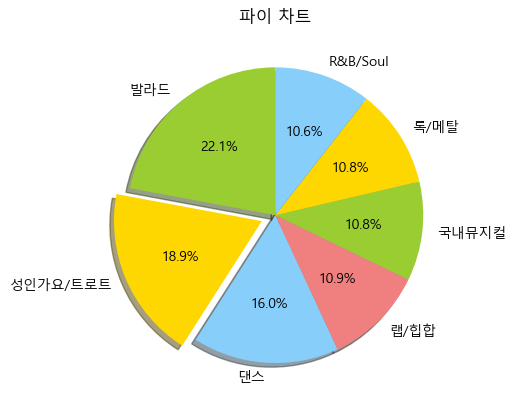

In [178]:
ratio = gli
labels = gg.index
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0,0,0,0) # 두번째 값이 밖으로 튀어 나오게해줘라
plt.pie(ratio, labels=labels , autopct='%.1f%%', colors=colors, explode=explode,
         startangle=90, shadow=True) # 시작위치 90도 
plt.title('파이 차트')
plt.show()

In [180]:
df.head(1)

,songId,title,artist,genre,album,lyricist,composer,date,img,comment,like,lyric,plylstSeq,ly_summary,year
0,418168,희재,성시경,발라드 국내영화,국화꽃 향기 OST,양재선,MGR,2003.02.01,https://cdnimg.melon.co.kr/cm/album/images/000...,332,138267,햇살은 우릴 위해 내리고\n바람도 서롤 감싸게 했죠\n우리 웃음속에 계절은 오고\n...,445029956 411111859,정말로 울면 내가 그댈 보내<br>준 것 같아서,2000


In [201]:
len(df[df['year'] == 1970])

42

In [ ]:
# df[df.date.str.contains('196')]

In [359]:
g6070 = pd.read_csv('static/data/melon_year6070_concat.csv')
g6070.head(1)

,songId,title,artist,genre,album,lyricist,composer,date,img,comment,like,lyric,plylstSeq
0,4083218,내일또 만납시다,금호동,성인가요/트로트,여인을 못잊어/그정 못잊어,전우,박춘석,20130401.0,https://cdnimg.melon.co.kr/cm/album/images/021...,13,263,하루의 일을 끝내고 돌아가는\r\n거리엔 사람의 물결\r\n하늘엔 별이 하나 둘 반...,460454132 518268022


In [360]:
gaga6070 = g6070.genre.value_counts().head(10).to_frame()
gaga6070

,count
genre,
성인가요/트로트,270
포크/블루스,85
발라드,39
록/메탈,17
국악 국악가요,5
발라드 성인가요/트로트,4
R&B/Soul,3
댄스,3


In [234]:
gaga.tail(4).sum()

count    15
dtype: int64

In [ ]:
gaga.append(new_row, ignore_index=True)

In [211]:
gaga.values[1][0]

85

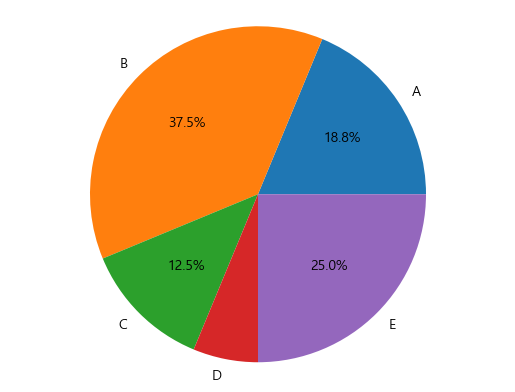

In [235]:
import matplotlib.pyplot as plt

# 데이터 설정
labels = ['A', 'B', 'C', 'D', 'E']
sizes = [15, 30, 10, 5, 20]

# 파이차트 생성
fig, ax = plt.subplots()
threshold = 10  # 레이블을 표시하지 않을 기준 퍼센트 값

# 퍼센트 값을 포매팅하는 함수 정의
def label_func(pct):
    if pct < threshold:
        return ''
    else:
        return f'{pct:.1f}%'

# 파이차트에 autopct 함수 설정 적용
ax.pie(sizes, labels=labels, autopct=label_func)

# 원 모양 유지
ax.axis('equal')

# 차트 표시
plt.show()

In [361]:
g6070li = []
for i in range(len(gaga6070.values)):
    abc = gaga6070.values[i][0]
    g6070li.append(abc)
g6070li

[270, 85, 39, 17, 5, 4, 3, 3]

In [237]:
threshold = 8 
def label_func(pct):
    if pct < threshold:
        return ''
    else:
        return f'{pct:.1f}%'

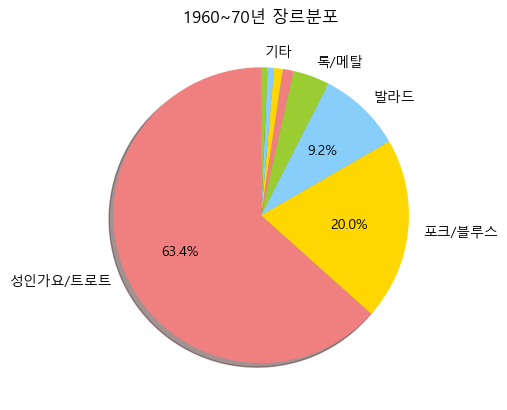

In [362]:
ratio = g6070li
labels = ['성인가요/트로트', '포크/블루스', '발라드', '록/메탈', '', '', '', '기타']
# colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
# colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
colors = ['lightcoral', 'gold', 'lightskyblue', 'yellowgreen' ]
explode = (0, 0.0, 0, 0,0,0,0,0) # 두번째 값이 밖으로 튀어 나오게해줘라
plt.pie(ratio, labels=labels , autopct=label_func, colors=colors, explode=explode,
         startangle=90, shadow=True) # 시작위치 90도 
plt.title('1960~70년 장르분포')
plt.show()

In [ ]:
g80 = df[df['year']== 1980] 
# g80.genre.value_counts().to_frame()

In [356]:
g80 = df[df['year']== 1980] 
g80.groupby('genre')['year'].agg(['count']).sort_values(by='count', ascending=False).head(8)

,count
genre,
성인가요/트로트,153
발라드,100
포크/블루스,77
록/메탈,52
댄스,9
R&B/Soul,3
발라드 성인가요/트로트,2
국내영화,1


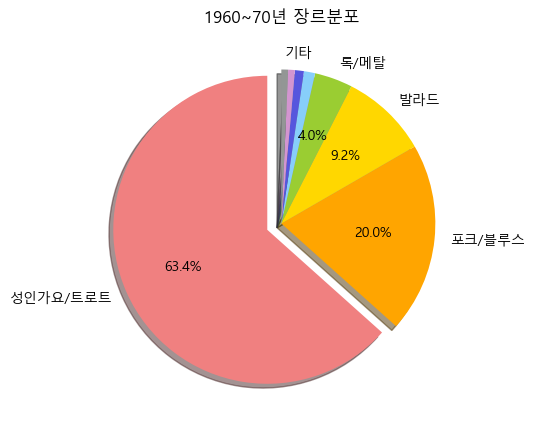

In [366]:
# g80 = df[df['year']== 1990] 
gg = g80.groupby('genre')['year'].agg(['count']).sort_values(by='count', ascending=False).head(8)
gli = []
for i in range(len(gg.values)):
    abc = gg.values[i][0]
    gli.append(abc)

threshold = 3 
def label_func(pct):
    if pct < threshold:
        return ''
    else:
        return f'{pct:.1f}%'
# autopct='%.1f%%'
# ratio = gli
ratio = g6070li
labels = ['성인가요/트로트', '포크/블루스', '발라드', '록/메탈', '', '', '', '기타']
# colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', '#d395d0']
# colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
colors = ['lightcoral','#ffa500', 'gold', 'yellowgreen', 'lightskyblue', '#5656dd', '#d395d0', '#939695']
# colors = ['#FFB3BA', '#FFDAB9', '#FFFFBA', '#B9FFC9', '#BAE1FF']
# colors = ['#ff9999', '#ffc000', '#8fd9b6','#BAE1FF' , '#d395d0']
explode = (0.1, 0.0, 0, 0,0,0,0,0) # 두번째 값이 밖으로 튀어 나오게해줘라

plt.figure(figsize=(5,5))
plt.pie(ratio ,labels=labels, autopct=label_func, colors=colors, explode=explode,
         startangle=90, shadow=True) # 시작위치 90도 

plt.title('1960~70년 장르분포')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# 데이터 설정
labels = ['A', 'B', 'C', 'D', 'E']
sizes = [15, 30, 25, 10, 20]
colors = ['red', 'blue', 'green', 'yellow', 'orange']

# 파이차트 그리기
wedges, texts, autotexts = plt.pie(sizes,  colors=colors, autopct='%1.1f%%', startangle=90)

# 퍼센트와 레이블 위치 조정
plt.gca().set_aspect('equal')
plt.gca().set_position([0, 0, 0.5, 1])

# 레벨과 퍼센트 표시
for i, text in enumerate(autotexts):
    percentage = sizes[i]
    level = labels[i]
    text.set_text(f'{level}\n{percentage}%')

# 제목 설정
plt.title('Pie Chart')

# 차트 표시
plt.show()